In [169]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import requests
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 程式介紹_台灣出生人數圖像化


## 讀入資料並做整理

In [127]:
df=pd.read_csv("https://quality.data.gov.tw/dq_download_csv.php?nid=100321&md5_url=d683b62f41037aa246ffb6df10b4657c")

In [128]:
df=df[df.birth_count!='0']#將資料為0得去除

In [129]:
df.drop(columns=["according","mother_age","statistic_yyy"],inplace=True)

In [130]:
df.columns=["區域別","出生者性別","嬰兒出生數"]#改變欄位名稱
df.drop(index=0,inplace=True)

In [131]:
df.嬰兒出生數=df.嬰兒出生數.astype(int)

In [189]:
df["district"]=df["區域別"].apply(lambda x:x[:3])

In [190]:
df.head()

,區域別,出生者性別,嬰兒出生數,district
2,新北市板橋區,男,2,新北市
4,新北市板橋區,男,4,新北市
5,新北市板橋區,男,7,新北市
6,新北市板橋區,男,6,新北市
7,新北市板橋區,男,13,新北市


## 分類資料

In [191]:
dfdistrict=df.groupby(["district","出生者性別"]).sum()

In [192]:
dfdistrict.head()

嬰兒出生數
district 出生者性別       
南投縣      女       1531
         男       1701
嘉義市      女        870
         男       1016
嘉義縣      女       1258

In [193]:
place=df.groupby(by="district").sum()

In [196]:
place["TOWN"]=place.index
place["TOWN"]=place["TOWN"]

In [197]:
place.head()

,嬰兒出生數,TOWN
district,,
南投縣,3232,南投縣
嘉義市,1886,嘉義市
嘉義縣,2559,嘉義縣
基隆市,2180,基隆市
宜蘭縣,3055,宜蘭縣


## 讀取已下載的台灣疆界圖

In [145]:
taiwan=gpd.read_file("../11.13/mapdata201910221133/TOWN_MOI_1081007.shp",encoding='utf-8')

In [149]:
taiwan.tail()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
363,D22,67000150,臺南市,七股區,Qigu District,D,67000,"POLYGON ((120.13989 23.19585, 120.14003 23.195..."
364,D23,67000160,臺南市,將軍區,Jiangjun District,D,67000,"POLYGON ((120.08374 23.24056, 120.08470 23.239..."
365,H10,68000100,桃園市,平鎮區,Pingzhen District,H,68000,"POLYGON ((121.22256 24.94984, 121.22259 24.949..."
366,E02,64000020,高雄市,鼓山區,Gushan District,E,64000,"POLYGON ((120.27878 22.67380, 120.27891 22.673..."
367,E03,64000030,高雄市,左營區,Zuoying District,E,64000,"POLYGON ((120.30865 22.65505, 120.30882 22.656..."


## 結合台灣疆界和出生小孩人數的資料

In [200]:
df_merge=taiwan.merge(place,left_on=('COUNTYNAME'), right_on=('TOWN'))

In [201]:
df_merge.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry,嬰兒出生數,TOWN
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213...",1479,臺東縣
1,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ...",1479,臺東縣
2,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ...",1479,臺東縣
3,V09,10014050,臺東縣,鹿野鄉,Luye Township,V,10014,"POLYGON ((121.19419 22.93667, 121.19392 22.936...",1479,臺東縣
4,V10,10014060,臺東縣,池上鄉,Chishang Township,V,10014,"POLYGON ((121.21208 23.14418, 121.21230 23.144...",1479,臺東縣


## 將結合的資料畫圖畫出來

(21.8, 26)

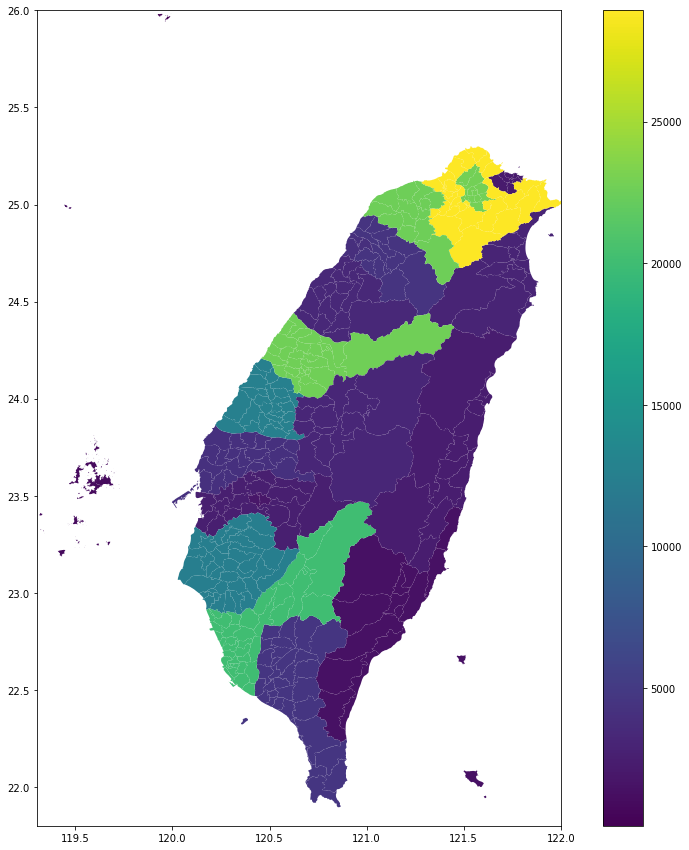

In [223]:
df_merge.plot(column='嬰兒出生數',figsize=(15,15),legend=True)
plt.xlim([119.3, 122])
plt.ylim([21.8, 26])